╒═════╤══════════════════╤═══════════════════╤════════════╕
│   # │   measure_values │   estimate_values │   K_values │
╞═════╪══════════════════╪═══════════════════╪════════════╡
│   0 │               81 │           78.75   │  0.625     │
├─────┼──────────────────┼───────────────────┼────────────┤
│   1 │               83 │           80.3846 │  0.384615  │
├─────┼──────────────────┼───────────────────┼────────────┤
│   2 │               79 │           80      │  0.277778  │
├─────┼──────────────────┼───────────────────┼────────────┤
│   3 │               78 │           79.5652 │  0.217391  │
├─────┼──────────────────┼───────────────────┼────────────┤
│   4 │               81 │           79.8214 │  0.178571  │
├─────┼──────────────────┼───────────────────┼────────────┤
│   5 │               79 │           79.697  │  0.151515  │
├─────┼──────────────────┼───────────────────┼────────────┤
│   6 │               80 │           79.7368 │  0.131579  │
├─────┼──────────────────┼──────────────

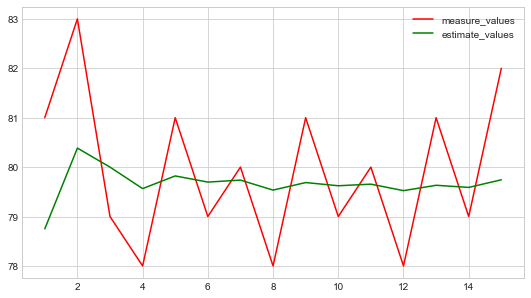

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from tabulate import tabulate
measure_count = 15
measure_values = [81,83,79,78,81,79,80,78,81,79,80,78,81,79,82]
measure_error = [3] * 15
pre_estimate_value = 75
pre_estimate_error = 5
estimate_values = np.zeros(measure_count)
estimate_errors = np.zeros(measure_count)
K_values = np.zeros(measure_count)

for i in range(measure_count):
    # K_n = \frac{最优估计值误差_{n_1}}{最优估计值误差_{n_1} + 测量值误差_n}
    K_values[i] = pre_estimate_error/(pre_estimate_error + measure_error[i])
    # 最优估计值_n = 最优估计值_{n-1} + K_n \times (测量值_n - 最优估计值_{n-1})
    estimate_values[i] = pre_estimate_value + K_values[i] * (measure_values[i] - pre_estimate_value)
    # 最优估计值误差_{n-1} = (1 - K_{n-1}) \times 最优估计值误差_{n-2}
    estimate_errors[i] = (1 - K_values[i]) * pre_estimate_error

    pre_estimate_value = estimate_values[i]
    pre_estimate_error = estimate_errors[i]
    
#print("K_values=",K_values)
#print("estimate_values=", estimate_values)
#print("estimate_errors=", estimate_errors)

table = [['#', 'measure_values', 'estimate_values', "K_values"]]
for i in range(measure_count):
    table.append([i, measure_values[i], estimate_values[i], K_values[i]])
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

fig = plt.figure(figsize=[9,5])
ax = plt.axes()

x = np.linspace(1, 15, 15)
_ = ax.plot(x, measure_values, label="measure_values", color='red')
_ = ax.plot(x, estimate_values, label="estimate_values", color='green')

_=plt.legend(loc='upper right')
plt.show()